# script to graph opentuner log

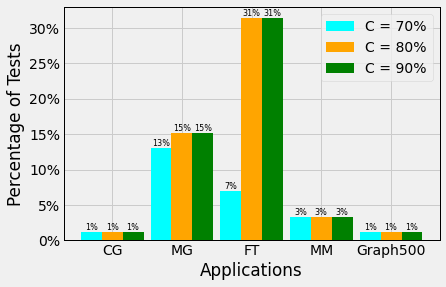

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter

# percentage of tuning tests required to get close to the optimal execution time within the tuning period
def graph_tests(**logs): #dict logs={AAA:"xxx", BBB:"yyy", CCC:"zzz"}
    C1 = []
    C2 = []
    C3 = []
    for appname, logname in logs.items():
        data = pd.read_csv(logname, sep=" ", names=["wallclock", "exectime"])
        tmin = min(data["exectime"])
        ntests = len(data["exectime"])
        R1 = 0.0
        R2 = 0.0
        R3 = 0.0
        for i in range(ntests):
            if R1 == 0.0 and 1 - (data["exectime"][i] - tmin)/tmin > 0.7:
                R1 = (i+1)/ntests
            if R2 == 0.0 and 1 - (data["exectime"][i] - tmin)/tmin > 0.8:
                R2 = (i+1)/ntests
            if R3 == 0.0 and 1 - (data["exectime"][i] - tmin)/tmin > 0.9:
                R3 = (i+1)/ntests
                break
        C1.append(R1)
        C2.append(R2)
        C3.append(R3)
    # plot data in grouped manner of bar type
    x = np.arange(len(logs)) # different from range(), can subtract -
    width = 0.3
    plt.bar(x-width, C1, width, color='cyan')
    plt.bar(x, C2, width, color='orange')
    plt.bar(x+width, C3, width, color='green')
    for a, b in list(zip(x-width, C1)) + list(zip(x, C2)) + list(zip(x+width, C3)):
        plt.text(a, b, '%.0f%%'%(b*100), ha="center", va="bottom", fontsize=8)
    plt.xticks(x, list(logs.keys()))
    plt.xlabel("Applications")
    plt.ylabel("Percentage of Tests")
    plt.legend(["C = 70%", "C = 80%", "C = 90%"])
    ax = plt.gca()
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(1)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1)
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0, decimals=0))
    # plt.savefig('tests.eps', bbox_inches='tight', transparent=True)
    plt.show()

graph_tests(CG="cg.A.64.log", MG="mg.A.64.log", FT="ft.A.64.log", MM="gemm.64.log", Graph500="graph500.64.log")

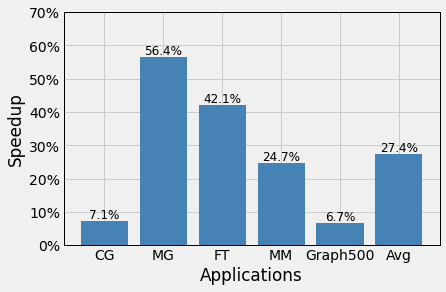

In [3]:
# speedup within the tuning period
def graph_speedup(**logs): #dict logs={AAA:"xxx", BBB:"yyy", CCC:"zzz"}
    S = []
    for appname, logname in logs.items():
        data = pd.read_csv(logname, sep=" ", names=["wallclock", "exectime"])
        tmin = min(data["exectime"])
        tini = data["exectime"][0]
        speedup = (tini-tmin)/tini
        S.append(speedup)
    S.append(np.mean(S))
    # plot data in grouped manner of bar type
    x = np.arange(len(logs)+1) # different from range(), can subtract -
    width = 0.8
    plt.bar(x, S, width, color='steelblue')
    for a, b in zip(x, S):
        plt.text(a, b, '%.1f%%'%(b*100), ha="center", va="bottom", fontsize=12)
    appnames = list(logs.keys())
    appnames.append("Avg")
    plt.xticks(x, appnames)
    plt.xlabel("Applications")
    plt.ylabel("Speedup")
    ax = plt.gca()
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(1)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1)
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0, decimals=0))
    plt.ylim(top=0.7)
    # plt.savefig('speedup.eps', bbox_inches='tight', transparent=True)
    plt.show()        

graph_speedup(CG="cg.A.64.log", MG="mg.A.64.log", FT="ft.A.64.log", MM="gemm.64.log", Graph500="graph500.64.log")